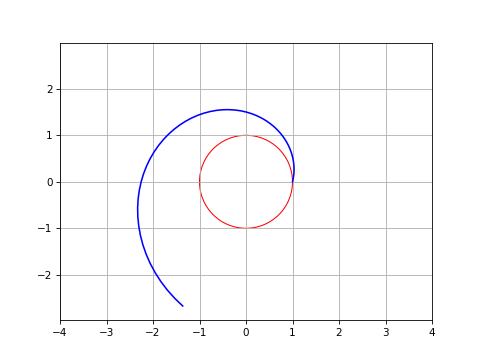

In [40]:
#------------------------------------------------------------
# Understanding the log curve formula
#
# The log curve formula is: r(i) = a * exp(k * theta(i))
#
# where:
#   r(i) is the distance from the center of the log curve 
#       to the curve at angle theta(i)
#   a scales the distance of the curve from the center
#   k is the curvature of the curve, found by: cos(angle)
#       k = cos(0°) is a straight line
#       k = cos(90°) is a circle
#       So for a tighter, change the angle to a higher value
#   theta(i) is the angle from the x axis to the point on 
#       the curve
#
# P(r, theta) is a polar coordinate
# Convert to Cartesian coordinates:
# P(x, y) = (r * cos(theta), r * sin(theta))
#------------------------------------------------------------

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, basic_log_curve_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
basic_log_curve_plot.axis('equal') # Set the aspect ratio of the plot to be equal
basic_log_curve_plot.set_xlim(-4, 4) # Set the limits of the plot
basic_log_curve_plot.set_ylim(-4, 4) # Set the limits of the plot
basic_log_curve_plot.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta_from_index(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta_from_index(i))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
circle = plt.Circle((0, 0), 1, color='r', fill=False)
basic_log_curve_plot.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta_from_index(i))
    y = r(i) * math.sin(theta_from_index(i))
    points.append([x, y])

basic_log_curve_plot.plot([x for x, y in points], [y for x, y in points], 'b-')


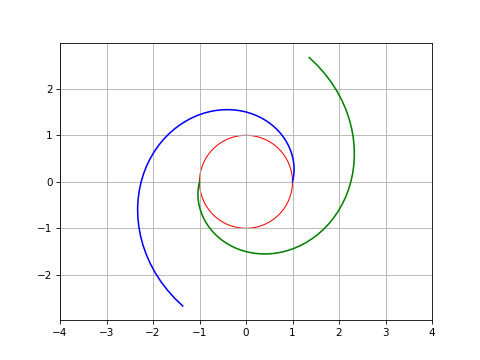

In [41]:
#------------------------------------------------------------
# 
#   Altering the graph - rotate the curve
#
#  To rotate the curve, theta will need an offset added to it
#  However, you can't just directly add it like this
#  r = a * exp(k * (theta + offset))
#
#  Let's consider it's the exponent that we are changing when
#  we add an offset to theta
#  r = a * exp(k * (theta + offset))
#  This would change the value of r, which we don't want.
#
#  This can be rewritten as:
#  r = a * exp(k * theta + k * offset)
#  If we don't want to change the equation:
#  k * offset - k * offset = 0
#  So we can add: 
#  k * theta + k * offset - k * offset
#  Do some grouping:
#  k * (theta + offset) - k * offset
#  Because we are working with exponents, this is what we 
#  end up with:
#  exp(k * (theta + offset))exp(- k * offset)
#
#  So to rotate the curve, we need to do this:
#  r = a * exp(k * (theta + offset)) * exp(- k * offset)
#------------------------------------------------------------

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, shifted_log_curve = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
shifted_log_curve.axis('equal') # Set the aspect ratio of the plot to be equal
shifted_log_curve.set_xlim(-4, 4) # Set the limits of the plot
shifted_log_curve.set_ylim(-4, 4) # Set the limits of the plot
shifted_log_curve.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta_from_index(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta_from_index(i))

def shifted(i):
    return a * math.exp(k * (theta_from_index(i) + math.radians(45))) * math.exp(-k * math.radians(45))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
circle = plt.Circle((0, 0), 1, color='r', fill=False)
shifted_log_curve.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
shifted_points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta_from_index(i))
    y = r(i) * math.sin(theta_from_index(i))
    points.append([x, y])
    x_ = shifted(i) * math.cos(theta_from_index(i) + math.radians(180))
    y_ = shifted(i) * math.sin(theta_from_index(i) + math.radians(180))
    shifted_points.append([x_, y_])

shifted_log_curve.plot([x for x, y in points], [y for x, y in points], 'b-')
shifted_log_curve.plot([x for x, y in shifted_points], [y for x, y in shifted_points], 'g-')

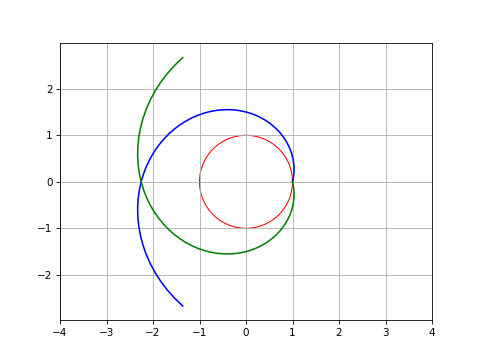

In [42]:
#------------------------------------------------------------
# 
#   Altering the graph - mirror the curve
#
#  To change the direction of travel around a curve, in
#  polar coordinates, you simply change the sign of theta
#  -(theta)
#  However, for our forumla:
#  r = a * exp(k * theta), if you change the sign of theta
#  you will change the value of r.
#
#  If we (again) consider the exponent:
#  k*theta, to change the direction of travel without 
#  changing the value of r, we need to do this:
#  k * theta + 0
#  0 = 2k * theta - 2k * theta
#  So we can add:
#  k * theta + 2k * theta - 2k * theta
#  Do some simplifying
#  (-2k * theta + k * theta) + (2k * theta)
#  (-k * theta) + (2k * theta)
#  Which brings us to:
#  r = a * exp(-k * theta) * exp(2k * theta)
#
#------------------------------------------------------------

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, mirrored_log_curve = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
mirrored_log_curve.axis('equal') # Set the aspect ratio of the plot to be equal
mirrored_log_curve.set_xlim(-4, 4) # Set the limits of the plot
mirrored_log_curve.set_ylim(-4, 4) # Set the limits of the plot
mirrored_log_curve.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta_from_index(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta_from_index(i))

def mirrored(i):
    return a * math.exp(-k * theta_from_index(i)) * math.exp(2 * k * theta_from_index(i))

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
circle = plt.Circle((0, 0), 1, color='r', fill=False)
mirrored_log_curve.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
mirrored_points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta_from_index(i))
    y = r(i) * math.sin(theta_from_index(i))
    points.append([x, y])
    x_ = mirrored(i) * math.cos(-theta_from_index(i))
    y_ = mirrored(i) * math.sin(-theta_from_index(i))
    mirrored_points.append([x_, y_])

mirrored_log_curve.plot([x for x, y in points], [y for x, y in points], 'b-')
mirrored_log_curve.plot([x for x, y in mirrored_points], [y for x, y in mirrored_points], 'g-')

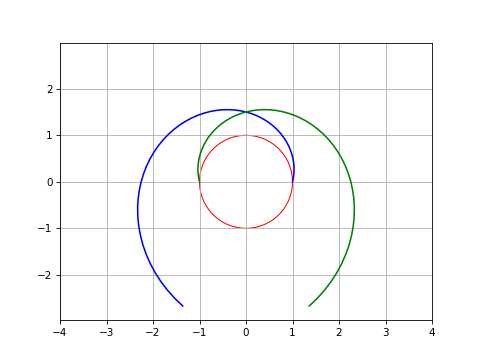

In [43]:
#------------------------------------------------------------
# 
#   Altering the graph - mirrored and rotated curve
#
#  To mirror and rotate the curve, we need to combine the
#  two transformations:
#  r = a * exp(k * (theta + offset)) * exp(- k * offset)
#  r = a * exp(-k * theta) * exp(2k * theta)
#  Which gives us
#  r = a * exp(-k * (theta + offset)) * exp(-k * (offset)) * exp(2k * (theta+offset))
#
#------------------------------------------------------------

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, mirrored_and_rotated_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
mirrored_and_rotated_plot.axis('equal') # Set the aspect ratio of the plot to be equal
mirrored_and_rotated_plot.set_xlim(-4, 4) # Set the limits of the plot
mirrored_and_rotated_plot.set_ylim(-4, 4) # Set the limits of the plot
mirrored_and_rotated_plot.grid(True) # Turn on the grid

#------------------------------------------------------------
# Define the log curve parameters
#------------------------------------------------------------
a = 1.0
k = math.cos(math.radians(75))
def theta_from_index(i):
    return i * math.pi / 40 # a good number to have a smooth curve

def r(i):
    return a * math.exp(k * theta_from_index(i))

def mirrored_and_rotated(i):
    adjusted_theta = math.pi + theta_from_index(i)
    return a * math.exp(-k * adjusted_theta) * math.exp(-k * math.pi) * math.exp(2 * k * adjusted_theta)

#------------------------------------------------------------
# Plot a circle for reference
#------------------------------------------------------------
circle = plt.Circle((0, 0), 1, color='r', fill=False)
mirrored_and_rotated_plot.add_artist(circle)

#------------------------------------------------------------
# Plot the log curve
#------------------------------------------------------------
points = []
mirrored_and_rotated_points = []
for i in range(0, 55):
    x = r(i) * math.cos(theta_from_index(i))
    y = r(i) * math.sin(theta_from_index(i))
    points.append([x, y])
    x_ = mirrored_and_rotated(i) * math.cos(-theta_from_index(i) + math.pi)
    y_ = mirrored_and_rotated(i) * math.sin(-theta_from_index(i) + math.pi)
    mirrored_and_rotated_points.append([x_, y_])

mirrored_and_rotated_plot.plot([x for x, y in points], [y for x, y in points], 'b-')
mirrored_and_rotated_plot.plot([x for x, y in mirrored_and_rotated_points], [y for x, y in mirrored_and_rotated_points], 'g-')

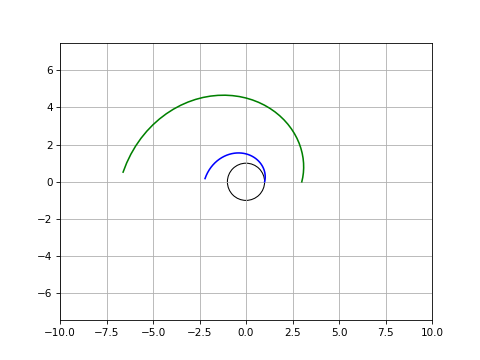

In [44]:
#------------------------------------------------------------
# 
#   Log Curve Constants - Scaling r
#
#  The curve shape come from the exponential term:
# exp(k*theta)
#
#  The r value can be scaled using the term 'a' in the
# function
#
#  Just for getting started, I think a constant value should
# suffice, but I'll make this a function that accepts an 
# iteration argument in case I want to have a dynamic value
#
#------------------------------------------------------------

fig, scale_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
scale_plot.axis('equal') # Set the aspect ratio of the plot to be equal
scale_plot.grid(True) # Turn on the grid
scale_plot.set_xlim(-10, 10) # Set the limits of the plot
scale_plot.set_ylim(-10, 10) # Set the limits of the plot

def scale_factor(scale = 1, i=1):
    return scale * i

scale1 = []
scale3 = []
k = math.cos(math.radians(75))
for i in range(0, 40):
    theta = i * math.pi / 40
    distance = 1 * math.exp(k * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    scale1.append([x, y])
    distance = 3 * math.exp(k * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    scale3.append([x, y])

scale_plot.plot([x for x, y in scale1], [y for x, y in scale1], 'b-')
scale_plot.plot([x for x, y in scale3], [y for x, y in scale3], 'g-')

circle = plt.Circle((0,0), 1, color='k', fill=False)
scale_plot.add_artist(circle)

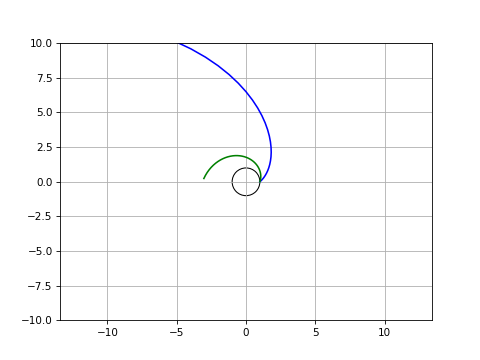

In [45]:
#------------------------------------------------------------
# 
#   Pitch angle drives how tight the curve is.
#
# k is the curvature of the curve, found by: cos(angle)
#
# k = cos(0°) is a straight line
# k = cos(90°) is a circle
# So for a tighter curve, change the angle to a higher value
#
#------------------------------------------------------------

fig, pitch_angle_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
pitch_angle_plot.axis('equal') # Set the aspect ratio of the plot to be equal
pitch_angle_plot.grid(True) # Turn on the grid
pitch_angle_plot.set_xlim(-10, 10) # Set the limits of the plot
pitch_angle_plot.set_ylim(-10, 10) # Set the limits of the plot

# Returns the pitch angle of the log curve
def pitch_angle(angle=40, divisions=40):
    return 1/math.tan(math.radians(angle))

pa_40 = []
pa_70 = []
for i in range(0, 40):
    theta = i * math.pi / 40
    distance = math.exp(pitch_angle(40) * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    pa_40.append([x, y])
    distance = math.exp(pitch_angle(70) * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    pa_70.append([x, y])

pitch_angle_plot.plot([x for x, y in pa_40], [y for x, y in pa_40], 'b-')
pitch_angle_plot.plot([x for x, y in pa_70], [y for x, y in pa_70], 'g-')

circle = plt.Circle((0,0), 1, color='k', fill=False)
pitch_angle_plot.add_artist(circle)

In [46]:
#------------------------------------------------------------
# 
#   Calculating theta from an index
#
#  The resolution controls how fine the curve is
#  Index is used as a multiplier to move around the curve
#
#  A good number to have a smooth curve
#------------------------------------------------------------
def theta_from_index(i = 0, resolution = 40):
    return i * math.pi / resolution # 

In [47]:
#------------------------------------------------------------
# 
#   Define r and r' functions
#
#  r(i) = a * exp(k * (theta(i) + rotation)) exp(- k * rotation)
#  r'(i) = a 
#          * exp(-k * (theta + offset + rotation)) 
#          * exp(-k * (offset + rotation)) 
#          * exp(2k * (theta + offset + rotation))))
#
#------------------------------------------------------------

resolution = 100
round_by = 4

def calculate_r(args):
    a, k, theta, rotation = args
    return a * math.exp(k * (theta + rotation)) * math.exp(-k * rotation)

def calculate_r_prime(args):
    a, k, theta, rotation = args
    return a * math.exp(-k * (math.pi + rotation + theta)) * math.exp(-k * (math.pi + rotation)) * math.exp(2 * k * (math.pi + rotation + theta))

def r(i, rotation=0):
    a = scale_factor()
    k = pitch_angle()
    theta = theta_from_index(i, resolution) + rotation
    r = a * math.exp(k * theta) * math.exp(-k * rotation)
    point = {
        "r": r,
        "theta": theta,
        "x": np.round(r * math.cos(theta + rotation), round_by),
        "y": np.round(r * math.sin(theta + rotation), round_by)
    }
    return point

def r_prime(i, rotation=0):
    a = scale_factor()
    k = pitch_angle()
    theta = theta_from_index(i, resolution)
    r = calculate_r_prime((a, k, theta, rotation))
    point = {
        "r": r,
        "theta": theta,
        "x": np.round(r * math.cos(-theta + math.pi + rotation), round_by),
        "y": np.round(r * math.sin(-theta + math.pi + rotation), round_by)
    }
    return point

1
1


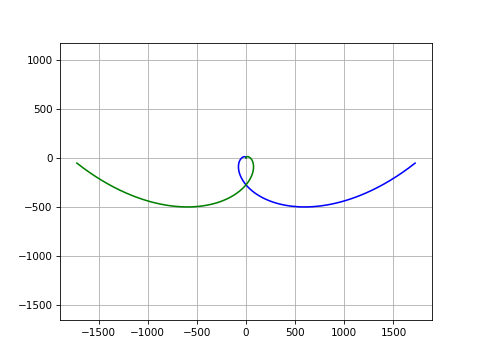

In [48]:
#------------------------------------------------------------
# 
#   Generate a set of curves
#
#   Inputs:
#     - qty: The number of curves to generate
#
#   Outputs:
#     - Curves, an array of curves, where the data point
#       is an array of points as returned by the r and r'
#------------------------------------------------------------
fig, curve_generator = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
curve_generator.axis('equal') # Set the aspect ratio of the plot to be equal
curve_generator.grid(True) # Turn on the grid
# curve_generator.set_xlim(-10, 10) # Set the limits of the plot
# curve_generator.set_ylim(-10, 10) # Set the limits of the plot

def generate_curve(rotation, number_of_points=40):
    curve = []
    mirror_curve = []
    for i in range(0, number_of_points):
        curve.append(r(i, rotation))
        mirror_curve.append(r_prime(i, rotation))
    return {
        "curve": curve,
        "mirror_curve": mirror_curve
    }

def generate_curves(number_of_curves=1, number_of_points=40):
    curves = []
    mirrored_curves = []
    for i in range(0, number_of_curves):
        rotation = math.radians(i * 360 / number_of_curves)
        new_curves = generate_curve(rotation, number_of_points)
        curves.append(new_curves["curve"])
        mirrored_curves.append(new_curves["mirror_curve"])
    return {
        "curves": curves,
        "mirrored_curves": mirrored_curves
    }

def plot_curves(curves, chart):
    for curve in curves["curves"]:
        chart.plot([point["x"] for point in curve], [point["y"] for point in curve], 'b-')
    for mirrored_curve in curves["mirrored_curves"]:
        chart.plot([point["x"] for point in mirrored_curve], [point["y"] for point in mirrored_curve], 'g-')

curve_set = generate_curves(1, 200)
print(len(curve_set["curves"]))
print(len(curve_set["mirrored_curves"]))
plot_curves(curve_set, curve_generator)


In [49]:
#------------------------------------------------------------
# 
#   How do I find the points of intersections between two
#   curves using a discrete pair of arrays of points?
#
#   https://stackoverflow.com/questions/8317022/get-intersecting-rows-across-two-2d-numpy-arrays
#
#------------------------------------------------------------

def find_intersections_by_array(curve_1, curve_2):
    bool_compare = np.swapaxes(curve_1[:,:,None], 1, 2) == curve_2
    cross_prod = np.prod(bool_compare, axis=2)
    cum_sum = cross_prod * np.cumsum(cross_prod, axis=0)
    compared = cum_sum == 1
    sum_to_n_x_1_size = np.sum(compared, axis=1).astype(bool)
    indices = np.where(sum_to_n_x_1_size)
    return indices

def find_curve_intersections_by_array(curve_set):
    curves = curve_set["curves"]
    mirrored_curves = curve_set["mirrored_curves"]
    indices = []
    for curve in curves:
        for mirrored_curve in mirrored_curves:
            # Gather the points
            cx = np.array([point["x"] for point in curve])
            cy = np.array([point["y"] for point in curve])
            mx = np.array([point["x"] for point in mirrored_curve])
            my = np.array([point["y"] for point in mirrored_curve])
            # Structure the data
            c = np.swapaxes([cx, cy], 0, 1)
            m = np.swapaxes([mx, my], 0, 1)
            matches = find_intersections_by_array(c, m)
            if len(matches[0]) > 0:
                indices.append(np.array([cx[matches[0]][0], cy[matches[0]][0]]))
    return indices

curve_set = generate_curves(1, 200)
intersections = find_curve_intersections_by_array(curve_set)
# print(intersections)

[array([0.    , 6.5013]), array([-6.3383, -1.4467]), array([ 2.8208, -5.8575]), array([5.0829, 4.0535]), array([-5.0829,  4.0535]), array([-2.8208, -5.8575]), array([ 6.3383, -1.4467])]
7


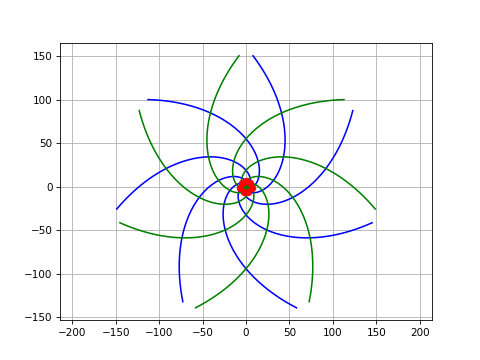

In [50]:
#------------------------------------------------------------
# 
#   Find the set of points shared by 2 or more lines
#
#   Remember that curves never interect the non-mirrored
#   curves, so we don't have to check each curve all curves
#
#------------------------------------------------------------

fig, matching_points = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
matching_points.axis('equal') # Set the aspect ratio of the plot to be equal
matching_points.grid(True) # Turn on the grid
# matching_points.set_xlim(-8, 8) # Set the limits of the plot
# matching_points.set_ylim(-8, 8) # Set the limits of the plot

curve_set = generate_curves(7, 135)
plot_curves(curve_set, matching_points)

intersections = find_curve_intersections_by_array(curve_set)
print(intersections)
print(len(intersections))
for intersection in intersections:
    matching_points.plot(intersection[0], intersection[1], 'ro')

In [51]:
#------------------------------------------------------------
# 
#   How do I find the points of intersections between two
#   curves using the formulas?
#
#   I don't think I can do this with the polar coordinates,
#   because (r1, theta1) and (r2, theta2) are not equal 
#   but their cartesian coordinates can be.
#
#   Maybe I need to do this:
#   x1 = r1 * cos(theta1)
#   y1 = r1 * sin(theta1)
#   x2 = r2 * cos(-theta2)
#   y2 = r2 * sin(-theta2)
#
#   x1 = np.round(r1 * math.cos(theta1 + rotation1), round)
#   y1 = np.round(r1 * math.sin(theta1 + rotation1), round)
#   x2 = np.round(r2 * math.cos(-theta2 + math.pi + rotation2), round)
#   y2 = np.round(r2 * math.sin(-theta2 + math.pi + rotation2), round)
#
#   x1 = np.round(a * math.exp(k * theta1) * math.exp(-k * rotation1) * math.cos(theta1 + rotation1), round)
#   y1 = np.round(a * math.exp(k * theta1) * math.exp(-k * rotation1) * math.sin(theta1 + rotation1), round)
#
#   x2 = np.round(a * math.exp(-k * (math.pi + rotation2 + theta2)) * math.exp(-k * (math.pi + rotation2)) * math.cos(-theta2 + math.pi + rotation2), round)
#   y2 = np.round(a * math.exp(-k * (math.pi + rotation2 + theta2)) * math.exp(-k * (math.pi + rotation2)) * math.sin(-theta2 + math.pi + rotation2), round)
#
#   z1 = a * math.exp(-k * rotation1)
#   x1 = np.round(z1 * math.exp(k * theta1) * math.cos(theta1 + rotation1), round)
#   y1 = np.round(z1 * math.exp(k * theta1) * math.sin(theta1 + rotation1), round)
#
#   z2 = a * math.exp(-k * (math.pi + rotation2))
#   x2 = np.round(z2 * math.exp(-k * (math.pi + rotation2 + theta2)) * math.cos(-theta2 + math.pi + rotation2), round)
#   y2 = np.round(z2 * math.exp(-k * (math.pi + rotation2 + theta2)) * math.sin(-theta2 + math.pi + rotation2), round)
#
#   x1 = x2
#   y1 = y2
#
#   z1 * exp(k * theta1) * cos(theta1 + rotation1) = z2 * exp(-k * (pi + rotation2 + theta2)) * cos(-theta2 + pi + rotation2)
#   z1 * exp(k * theta1) * sin(theta1 + rotation1) = z2 * exp(-k * (pi + rotation2 + theta2)) * sin(-theta2 + pi + rotation2)
#
#   Can I convert this to f(theta1) = g(theta2) and solve for theta1 and theta2?
#   Can I find the derivative of each, then find the roots of those derivatives for each of those?  The shared roots are the intersections.
#
#   f'(theta1) = z1 * exp(k *  theta1) * (sin(-theta1 - rotation1 + 1) + k*cos(-theta1 - rotation1 + 1))
#
#   Roots:
#   k != 0, -k^2 + sqrt(k^2 +1) -1 != 0
#
#   This quickly turns into a mess (see in Wolfram-Mathematica)
#
#------------------------------------------------------------

C: 0, M: 0
[-1.0000000e+00 -2.0511602e-16]
[1.00000000e+00 1.64092816e-15]
X: -0.0, Y: 0.0


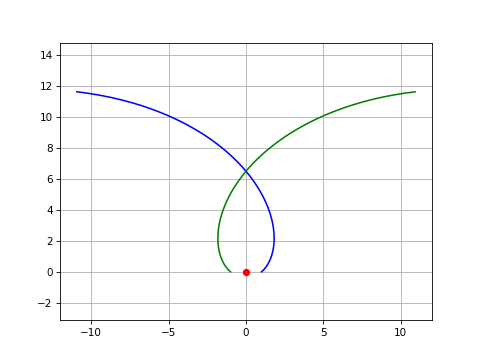

In [52]:
#------------------------------------------------------------
# 
#   Find the set of points shared by 2 or more lines
#
#   Try using NumPy's library to find roots
#
#------------------------------------------------------------
fig, matching_points_coef = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
matching_points_coef.axis('equal') # Set the aspect ratio of the plot to be equal
matching_points_coef.grid(True) # Turn on the grid
# matching_points.set_xlim(-8, 8) # Set the limits of the plot
# matching_points.set_ylim(-8, 8) # Set the limits of the plot

curve_set = generate_curves(1, 75)
plot_curves(curve_set, matching_points_coef)

curves = curve_set["curves"]
mirrored_curves = curve_set["mirrored_curves"]
indices = []
for cIndex, curve in enumerate(curves):
    for mIndex, mirrored_curve in enumerate(mirrored_curves):
        # Gather the points
        print("C: %s, M: %s" % (cIndex, mIndex))
        cx = np.array([point["x"] for point in curve])
        cy = np.array([point["y"] for point in curve])
        mx = np.array([point["x"] for point in mirrored_curve])
        my = np.array([point["y"] for point in mirrored_curve])
        poly = 1
        x_coefficients = np.polyfit(cx, mx, poly)
        # The intersection is the last value in the coefficients
        # x_intersection = x_coefficients[-1]
        x_intersection = round(x_coefficients[-1], 2)
        y_coefficients = np.polyfit(cy, my, poly)
        # y_intersection = y_coefficients[-1]
        y_intersection = round(y_coefficients[-1], 2)
        print(x_coefficients)
        print(y_coefficients)
        print("X: %s, Y: %s" % (x_intersection, y_intersection))
        matching_points_coef.plot(x_intersection, y_intersection, 'ro')
        

C: 0, M: 0


TypeError: curve_func() takes 2 positional arguments but 4 were given

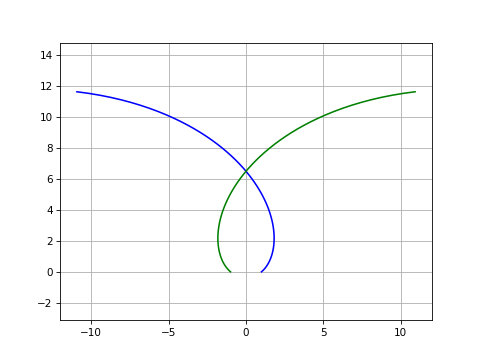

In [55]:
#------------------------------------------------------------
# 
#   Let's try using scipy's fsolve
#
#   https://scipy-cookbook.readthedocs.io/items/Intersection.html
#
#   I'm having trouble getting from r(theta) to an f(x) = 0
#   form.  I do have a series of [x,y] points, so I can use
#   those along with some python tooling to get a set of 
#   equations that i can use with fsolve?
#
#   https://stackoverflow.com/questions/46909373/how-to-find-the-exact-intersection-of-a-curve-as-np-array-with-y-0/46911822#46911822
#
#------------------------------------------------------------
from scipy.optimize import fsolve
import numpy as np

fig, find_roots_plot = plt.subplots()
# plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
find_roots_plot.axis('equal') # Set the aspect ratio of the plot to be equal
find_roots_plot.grid(True) # Turn on the grid
# matching_points.set_xlim(-8, 8) # Set the limits of the plot
# matching_points.set_ylim(-8, 8) # Set the limits of the plot

# N = 750

curve_set = generate_curves(1, 75)
plot_curves(curve_set, find_roots_plot)

def curve_func(x, args):
    a, k, rotation = args
    theta = math.radians(x)
    r = calculate_r((a, k, theta, rotation))
    return (
        np.round(r * math.cos(theta + rotation), 2),
        np.round(r * math.sin(theta + rotation), 2)
    )

def mirror_func(x, args):
    a, k, rotation = args
    theta = math.radians(x)
    r = calculate_r_prime((a, theta, x, rotation))
    return (
        np.round(r * math.cos(-theta + math.pi + rotation), 2),
        np.round(r * math.sin(-theta + math.pi + rotation), 2)
    )

def f():
    return 0




In [ ]:
#------------------------------------------------------------
# 
#   Set show the table top on the graph
#
#------------------------------------------------------------
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import math

#------------------------------------------------------------
# Create a figure and axis
#------------------------------------------------------------
fig, tabletop = plt.subplots()
plt.rcParams['figure.dpi'] = 150 # Set this to make the plot bigger
tabletop.axis('equal') # Set the aspect ratio of the plot to be equal
tabletop.set_xlim(-175, 175) # Set the limits of the plot
tabletop.set_ylim(-110, 50) # Set the limits of the plot
tabletop.grid(True) # Turn on the grid

#------------------------------------------------------------
# Create the table top
#------------------------------------------------------------
# Points for the table top, values are in cm
# I copied these from the project
A = (-167.64, -32.385)
B = (-167.64, -17.414)
C = (-130.203, 26.035)
D = (129.195, 26.035)
E = (167.64, -17.145)
F = (167.64, -95.885)
G = (76.20, -95.885)
H = (76.20, -32.385)

# Draw the table top
# Used (-) on the x axis to flip the table top on the x axis


def plot_table_on_chart(chart):
    chart.plot(
        [A[0], B[0], C[0], D[0], E[0], F[0], G[0], H[0], A[0]],
        [A[1], B[1], C[1], D[1], E[1], F[1], G[1], H[1], A[1]],
        'k-')
    
plot_table_on_chart(tabletop)

In [ ]:
#------------------------------------------------------------
# 
#   Get theta based on the current iteration
#
#------------------------------------------------------------

#------------------------------------------------------------
# Values should be treated as if they are in cm to avoid
# confusion when moving this over to the Fusion360 script.
#------------------------------------------------------------

#------------------------------------------------------------
# Setup the plotting tools
#------------------------------------------------------------

fig, theta_from_iteration_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
theta_from_iteration_plot.grid(True) # Turn on the grid

# How far we want the curves to start from the center
# It seems that setting this to 0 is the ideal option, we can
# always adjust the curve to start at a different point
radius_from_center = 0

# Because we are using polar coordinates to derive the curve,
# we need to find the distance from the center point.  That
# distance is calculated using the equation p = a * e^(k*theta)
# Theta is going to change, based on the number of points we want.
# To standardize, I made this linear function.
def theta_from_coordinate_counter(coordinate_counter):
    return coordinate_counter * math.pi / 40

thetas_for_plotting = []
for i in range(0, 60):
    thetas_for_plotting.append(theta_from_coordinate_counter(i))
theta_from_iteration_plot.plot(thetas_for_plotting, 'k-')

In [17]:
#------------------------------------------------------------
# 
#   Scaling the distance from the center after the exp()
#
#------------------------------------------------------------

#------------------------------------------------------------
# Values should be treated as if they are in cm to avoid
# confusion when moving this over to the Fusion360 script.
#------------------------------------------------------------

# Returns the scaling value for the distance scaling
# I could consider making this dynamic.
def scale_distance():
    return 1.1

In [ ]:
#------------------------------------------------------------
# 
#   Pitch angle drives how tight the curve is.
#
# if k = 90, we get a circle
# as k approaches 0, the curve becomes more linear
# So, for a tighter curve, we want to approach 90
# For a more linear curve, we want to approach 0
#
# The plot indicates the severity of the curve compared to a
# circle.  The circle is drawn in the plot to give a visual
#------------------------------------------------------------

fig, pitch_angle_plot = plt.subplots()
plt.rcParams['figure.dpi'] = 75 # Set this to make the plot bigger
pitch_angle_plot.axis('equal') # Set the aspect ratio of the plot to be equal
pitch_angle_plot.grid(True) # Turn on the grid

# Returns the pitch angle of the log curve
def pitch_angle():
    angle = 40
    return 1/math.tan(math.radians(angle))

print(pitch_angle())

points_for_plotting = []
for i in range(0, 40):
    theta = theta_from_coordinate_counter(i)
    distance = math.exp(pitch_angle() * theta)
    x = distance * math.cos(theta)
    y = distance * math.sin(theta)
    pitch_angle_plot.plot(x, y, 'ko')

circle = plt.Circle((0,0), 1, color='k', fill=False)
pitch_angle_plot.add_artist(circle)